# Consolidating final dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/danielbejarano/424b5 filings/final-data-424B5')
df.head()

,Unnamed: 0,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange,Label
0,0,1680378,Investing in ourshares of common stock involve...,2021-03-18,SNES,"SenesTech, Inc.",0.001328,-0.003177,neutral
1,1,1222719,Investing in any of our securities involves ri...,2021-01-31,CHY,CALAMOS CONVERTIBLE & HIGH INCOME FUND,0.004126,0.006552,neutral
2,2,1364954,An investment in our securities involves a hig...,2021-04-03,CHGG,"CHEGG, INC",0.065078,0.011987,neutral
3,3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",0.412805,0.058477,neutral
4,4,1409375,Investing in our common stock involves a high ...,2021-03-10,OESX,"ORION ENERGY SYSTEMS, INC.",-0.046603,-0.002521,increase


In [13]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df1 = pd.read_csv('/Users/danielbejarano/Documents/MSc. Information Management/Thesis/finaldickF')
df1.head()

,Unnamed: 0,Unnamed: 0.1,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange,Label
0,5,5,1823340,ITEM 1A. RISK FACTORS. An investment ...,2021-03-26,AGC,Altimeter Growth Corp.,0.151517,-0.000906,decrease
1,6,6,1823340,ITEM 1A. RISK FACTORS. An investment ...,2021-03-26,AGCUU,Altimeter Growth Corp.,0.171719,-0.001178,decrease
2,7,7,1830232,ITEM 1A. RISK FACTORS. An investmen...,2021-03-26,AGCB,Altimeter Growth Corp. 2,0.097644,0.002628,decrease
3,9,9,1787414,ITEM 7A.Quantitative and Qualitative Disclosur...,2021-03-26,BSBK,Bogota Financial Corp.,-0.003367,-0.000544,neutral
4,10,10,727273,ITEM 1A. Risk Factors Our business is subject...,2021-03-26,CDZI,CADIZ INC,0.164985,0.005437,decrease


In [17]:
df1.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [4]:
df2 = pd.read_csv('/Users/danielbejarano/Documents/MSc. Information Management/Thesis/final-data-8K')
df2.head()

,Unnamed: 0,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange,Label
0,0,1626745,"EffectiveApril 9, 2021, the Board of Directors...",2021-04-01,FVTI,"Fortune Valley Treasures, Inc.",-0.000716,0.000000,neutral
1,1,1717556,Aspreviously disclosed on a Current Report on ...,2021-04-01,BBIG,"Vinco Ventures, Inc.",-0.011463,-0.000747,increase
2,2,857949,"On April 5, 2021, China GreenAgriculture, Inc....",2021-04-01,CGA,"China Green Agriculture, Inc.",0.005373,0.003082,neutral
3,3,1810140,"As previously reported on October 26, 2020 by1...",2021-04-01,GOED,1847 Goedeker Inc.,0.005970,0.002522,neutral
4,4,850033,"On April 5, 2021, BP Prudhoe Bay Royalty Trust...",2021-04-01,BPT,BP PRUDHOE BAY ROYALTY TRUST,-0.004060,-0.002335,neutral


In [19]:
df2.drop(columns = 'Unnamed: 0', inplace = True)

In [21]:
dfs = [df, df1, df2]
df_final = pd.concat(dfs)
df_final.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange,Label
0,1680378,Investing in ourshares of common stock involve...,2021-03-18,SNES,"SenesTech, Inc.",0.001328,-0.003177,neutral
1,1222719,Investing in any of our securities involves ri...,2021-01-31,CHY,CALAMOS CONVERTIBLE & HIGH INCOME FUND,0.004126,0.006552,neutral
2,1364954,An investment in our securities involves a hig...,2021-04-03,CHGG,"CHEGG, INC",0.065078,0.011987,neutral
3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",0.412805,0.058477,neutral
4,1409375,Investing in our common stock involves a high ...,2021-03-10,OESX,"ORION ENERGY SYSTEMS, INC.",-0.046603,-0.002521,increase


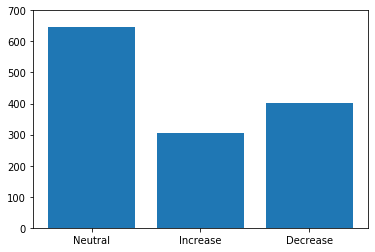

Price increased: 306 times
Price decreased: 401 times
Price did not move: 646 times


In [24]:
incr_counts = 0
decr_counts = 0
neutral_counts = 0

for i in df_final.Label:
    if i == 'neutral':
        neutral_counts += 1
    elif i == 'increase':
        incr_counts += 1
        
decr_counts = len(df_final) - (incr_counts + neutral_counts)

counts = [neutral_counts, incr_counts, decr_counts]
labels = ['Neutral', 'Increase', 'Decrease']

plt.bar(labels, counts)
plt.ylim([0, 700])
plt.show()

print('Price increased: {} times'.format(incr_counts))
print('Price decreased: {} times'.format(decr_counts))
print('Price did not move: {} times'.format(neutral_counts))

In [25]:
df_final.to_csv('final_consolidated_data', encoding = 'utf-8')